<a href="https://colab.research.google.com/github/dhruvi013/Machine-Learning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Read the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 2. Observe the shape of dataset
df.shape

(891, 12)

In [ ]:
# 3. Observe the statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 4. Observe the number of Non-NULL and datatype of each feature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 5. Bifurcate the categorical and numerical features of the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# 5. Bifurcate the categorical and numerical features of the dataset
categorical=[col for col in df.columns if df[col].dtype=="object"]
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
# 5. Bifurcate the categorical and numerical features of the dataset
numerical=[col for col in df.columns if df[col].dtype!="object"]
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# 6. Observe the number of null (N/A) values for each feature
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 7. Observe the percentage of null (N/A) values for each feature
round((df.isnull().sum())/len(df)*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
# 8. Drop the "Ticket" and "Name" features from the dataset
df1=df.drop(['Name', 'Ticket'],axis=1)
df1
df1.shape
# df.drop(columns=['Name', 'Ticket'])

(891, 10)

In [ ]:
# 9. Drop the feature corresponding to the highest missing values
df1=df1.drop(columns=['Cabin'], axis=1)
df1.shape

(891, 9)

In [ ]:
# 10. Drop the observations with missing values in the "Embarked" feature
df1.dropna(subset=['Embarked'],axis=0,inplace=True)
df1.shape

(889, 9)

In [ ]:
# 11. Fill the missing values of the "Age" feature with mean value
df1=df1.fillna(df1['Age'].mean())
#df1.info()

In [ ]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f556c2fe1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f556c2fe0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f556c2fd210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f556c2fd9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f556c2fd480>],
 'means': []}

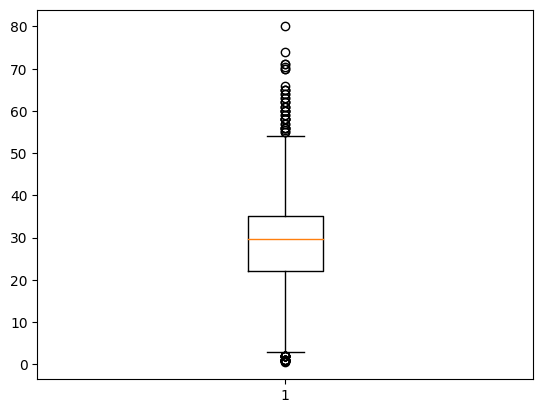

In [ ]:
# 12. Observe the boxplot of the "Age" feature
%matplotlib inline
plt.boxplot(df1["Age"])

In [ ]:
# 13. Nomalize the features with the numerical values using MinMaxScaler
from sklearn. preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
numerical=[col for col in df.columns if df[col].dtype!="object"]
x=df1
x[numerical]=scalar.fit_transform(x[numerical])
x
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.367204,0.065523,0.063742,0.062649
std,0.288762,0.486260,0.417350,0.162960,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.271174,0.000000,0.000000,0.015412
50%,0.500000,0.000000,1.000000,0.367204,0.000000,0.000000,0.028213
75%,0.749438,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
